# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of all absolute PLQY data.

In [1]:
import os
import shutil

import pandas as pd
from thot import ThotProject

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [2]:
# Initializes Thot project
db = ThotProject(dev_root = 'PLQY_results')

In [3]:
samples = db.find_assets( { 'type': 'absolute PL spectrum' } )
samples.sort( key = lambda asset: asset.name.lower() )  # by default, sort samples by name
for idx, sample in enumerate( samples ):
    A = sample.metadata[ 'A' ]
    PLQY = sample.metadata[ 'PLQY' ]
    if db.dev_mode():
        print(f'{idx}: {sample.name.split( "_absolute" )[ 0 ] }, A = {A:.1e}, PLQY = {PLQY:.1e}' )    

0: fto-2id, A = 6.7e-01, PLQY = 5.1e-01
1: fto-2id, A = 7.0e-01, PLQY = 1.6e-01
2: fto-3ga, A = 6.7e-01, PLQY = 5.3e-01
3: fto-3ga, A = 7.1e-01, PLQY = 1.6e-01
4: g1, A = 6.6e-01, PLQY = 2.4e-01
5: g1, A = 7.0e-01, PLQY = 3.0e-01
6: g2, A = 6.6e-01, PLQY = 2.6e-01
7: g2, A = 7.0e-01, PLQY = 3.0e-01
8: m1, A = 7.3e-01, PLQY = 5.5e-01
9: m1, A = 7.6e-01, PLQY = 1.4e-01
10: m2, A = 7.2e-01, PLQY = 8.7e-01
11: m2, A = 7.4e-01, PLQY = 1.5e-01


In [4]:
# Select samples and change order
do_this_step = True
if do_this_step and db.dev_mode():
    order = [ 0, 1, 2, 3, 4, 5 ]
    
    samples = [
        samples[ order[ idx ] ] 
        for idx in range( len( order ) )
    ]
    
    for idx, sample in enumerate( samples ):
        print( f'{idx}: {sample.name}' )
        
    do_this_step = False

0: fto-2id_absolute PL spectrum.csv
1: fto-2id_absolute PL spectrum.csv
2: fto-3ga_absolute PL spectrum.csv
3: fto-3ga_absolute PL spectrum.csv
4: g1_absolute PL spectrum.csv
5: g1_absolute PL spectrum.csv


In [5]:
def load_spectrum( asset ):
    return spc.PEL_spectrum.load(
        os.path.dirname( asset.file ),
        FN = os.path.basename( asset.file ),
        take_quants_and_units_from_file = True
    )

sa = [ load_spectrum( sample ) for sample in samples ]

fto-2id : A = 6.7e-01, PLQY = 5.1e-01, PF = 8.2e+20 1/(s m2)
fto-2id : A = 7.0e-01, PLQY = 1.6e-01, PF = 2.5e+20 1/(s m2)
fto-3ga : A = 6.7e-01, PLQY = 5.3e-01, PF = 8.7e+20 1/(s m2)
fto-3ga : A = 7.1e-01, PLQY = 1.6e-01, PF = 2.6e+20 1/(s m2)
g1      : A = 6.6e-01, PLQY = 2.4e-01, PF = 3.2e+20 1/(s m2)
g1      : A = 7.0e-01, PLQY = 3.0e-01, PF = 4.7e+20 1/(s m2)


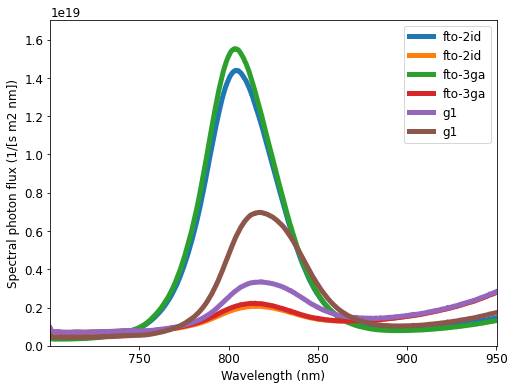

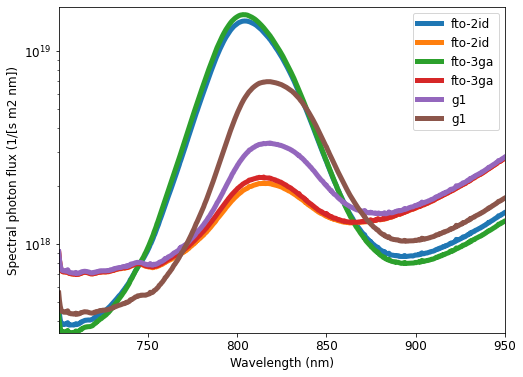

In [6]:
allPL = spc.PEL_spectra( sa )
allPL.names_to_label()

new_labels = []
strlen = int( max( [
    len( samples[ idx ].name.split( '_absolute' )[ 0 ] ) 
    for idx in range( len( samples ) )
] ) )

for idx in range( len( samples ) ):
    allPL.sa[idx].plotstyle = dict(
        color = gen.colors[ idx ],
        linewidth = 5,
        linestyle = '-'
    )
    
    sm = samples[ idx ].metadata
    A = sm[ 'A' ]
    PLQY = sm[ 'PLQY' ]
    s_name = samples[ idx ].name.split( '_absolute' )[ 0 ]
    new_labels.append(s_name)
    PF = allPL.sa[ idx ].photonflux( start = 700, stop = 900 )
    
    if db.dev_mode():
        print( f'{s_name.ljust(strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)' )

change_plotstyle = False
if change_plotstyle:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[2].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[3].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[4].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[5].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[6].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    allPL.sa[7].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    allPL.sa[8].plotstyle = dict(color = gen.colors[4], linewidth = 5, linestyle = '-')
    allPL.sa[9].plotstyle = dict(color = gen.colors[4], linewidth = 5, linestyle = '-')
    allPL.sa[10].plotstyle = dict(color = gen.colors[5], linewidth = 5, linestyle = '-')
    #allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[12].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[13].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    change_plotstyle = False
    
change_plotstyle = False
if change_plotstyle:
    for idx, sp in enumerate(allPL.sa):
        if idx < 5:
            sp.plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
#        elif idx < 12:
#            sp.plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
#        elif idx < 17:
#            sp.plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')            
        else:
            sp.plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')            
    change_plotstyle = False


#allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label( new_labels )
all_graph = allPL.plot(
    bottom = 0,
    plotstyle = 'individual',
    figsize = ( 8, 6 ),
    return_fig = True,
    show_plot = False
)

FN_lin = 'all_absolute_PL_spectra_linear.png'
lqy.add_graph( db, FN_lin, all_graph )
all_graph_log = allPL.plot(
    yscale = 'log',
    divisor = 1e3,
    plotstyle = 'individual',
    figsize = ( 8, 6 ),
    return_fig = True,
    show_plot = False
)

FN_log = 'all_absolute_PL_spectra_semilog.png'
lqy.add_graph( db, FN_log, all_graph_log )

In [7]:
names = []
A_arr = []
PLQY_arr = []
peak_arr = []
Eg_arr = []
Vsq_arr = []
dV_arr = []
QFLS_arr = []
adj_fac_arr = []
fs_absint_fac_arr = []
for sample in samples:
    sm = sample.metadata
    names.append( sample.name.split( '_absolute' )[ 0 ] )
    A_arr.append( sm[ 'A' ] )
    PLQY_arr.append( sm[ 'PLQY' ] )
    peak_arr.append( sm[ 'Peak' ] )
    Eg_arr.append( sm[ 'Eg' ] )
    Vsq_arr.append( sm[ 'Vsq' ] )
    dV_arr.append( sm[ 'dV' ] )
    QFLS_arr.append( sm[ 'QFLS' ] )
    adj_fac_arr.append( sm[ 'adj_fac' ] )
    fs_absint_fac_arr.append( sm[ 'fs_absint_factor' ] )

In [8]:
# Save PLQY data
do_this_step = True
if do_this_step:
    df = pd.DataFrame( {
        'Sample': names,
        'A': A_arr,
        'PLQY': PLQY_arr,
        'PL_peak (nm)': peak_arr,
        'Eg (eV)': Eg_arr,
        'Vsq (V)': Vsq_arr,
        'delta V (V)': dV_arr,
        'QFLS/q (V)': QFLS_arr,
        'fs-inb adjustment factor': adj_fac_arr,
        'fs-absolute intensity factor': fs_absint_fac_arr
    } )

    directory = os.path.dirname( samples[ 0 ].file )
    FN = 'PLQY.csv'
    # if save_ok(join(directory, FN)):
    #    df.to_csv(join(directory, FN), header = True, index = False)
        
    asset_prop = { 'name': f'csv_{FN}', 'type': 'csv', 'file': FN }
    asset_filepath = db.add_asset( asset_prop )
    df.to_csv( asset_filepath, header = True, index = False )
    do_this_step = False